<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_6%2C_8_~_9_pg_512_~_516%2C_529_~_543.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽 가이드 ch8. 6, 8 ~ 9 pg. 512 ~ 516, 529 ~ 543

## 6. 토픽 모델링 (topic modeling) - 20 뉴스그룹

-토픽 모델링: 문서 집합에 숨어있는 주제 찾기

-> LSA, LDA

In [1]:
# 20 뉴스그룹 데이터 셋 -> 8개 주제 추출, LDA 기반 토픽 모델링 적용
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토 사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출.
cats=['rec.motorcycles', 'rec.sport.baseball','comp.graphics','comp.windows.x','talk.politics.mideast','soc.religion.christian','sci.electronics','sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categories에 cats 입력
news_df=fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'),categories=cats,random_state=0)

#LDA는 COUNT 기반의 벡터화만 적용합니다.
count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',ngram_range=(1,2))

feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer shape: ',feat_vect.shape)

CountVectorizer shape:  (7862, 1000)


In [3]:
#피처 벡터화된 데이터 셋 기반 LDA 토픽 모델링 수행
lda=LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [4]:
#components_: 개별 토픽 별 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지 수치 가짐
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [8]:
#각 토픽별로 연관도 높은 순으로 word 나열

def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        #components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]

        #top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


topic 0 : 명확하지 않고 일반적인 단어

topic 1 : 컴퓨터 그래픽스

topic 2 : 기독교

topic 3 : 의학

topic 4 : 윈도우 운영 체제

topic 5 : 일반적인 단어

topic 6 : 중동 분쟁

topic 7 : 윈도우 운영체제

-> topic 0, 5, 7 : 애매한 주제어 / 모토사이클, 야구는 명확한 주제어 추출 안됨

## 8. 문서 유사도

- 문서 유사도 측정 방법 - 코사인 유사도

문서간 유사도 비교 : 코사인 유사도 : 벡터의 상호 방향성이 얼마나 유사한지 기반 (두 벡터 사잇각을 구해 얼마나 유사한지 수치로 적용)

-두 벡터 사잇각

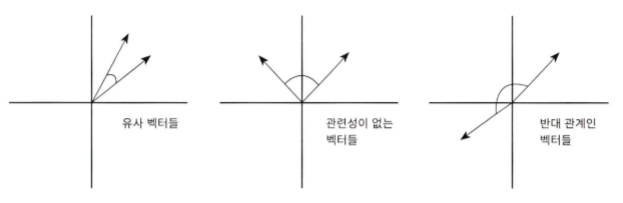

유사도 cos(세타)

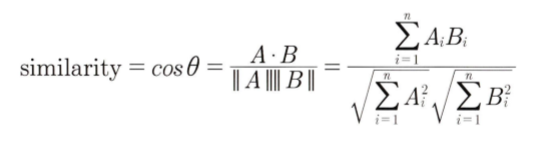

-코사인 유사도 사용 이유 : 문서 피처 벡터화 변환 시 차원 많은 희소 행렬 되기 쉬움. 희소 행렬 기반 문서에서 문서 벡터 간 크기에 기반한 유사도 지표(유클리드 거리)는 정확도 떨어지기 쉬움, 문서 긴경우 단어 빈도수 많으므로 빈도수 기반 공정하지 않음.

In [10]:
#코사인 유사도 기반 서로간 문서 유사도 구해보기
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [12]:
#doc_list로 정의된 3개 문서 유사도 비교 위해 tf-idf로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [14]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫번째 문장과 두번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print("문장 1, 문장 2 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [15]:

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print("문장 1, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print("문장 2, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [16]:
#sklearn.metrics.pairwise.cosine_similarity API 이용 -> 첫번째 파라미터: 비교 기준이 되는 문서의 피처 행렬, 두번째 파라미터: 비교되는 문서의 피처 행렬

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [18]:
#쌍으로 코사인 유사도값 제공 1&2, 2&3, 2&(1,3), 3&(1,2)
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape: ',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


- Opinion Review 데이터 세트를 이용한 문서 유사도 측정


In [67]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('wordnet')

path = '/'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df=pd.read_table(file_,index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())


document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words='english' , ngram_range=(1,2),
                             min_df=0.05, max_df=0.85)

tfidf_vect.fit(document_df['opinion_text'])
feature_vect = tfidf_vect.transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
#호텔 주제로 군집화된 데이터 먼저 추출, tfidfvectorizer의 데이ㅓㅌ 추출
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DATAFRAME에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 dataframe index:',hotel_indexes)

# 호텔 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]["filename"]
print("##### 비교 기준 문서명 ", comparison_docname, ' 와 타문서 유사도 #####')

# document_df에서 추출한 index 객체를 feature_vect로 입력해 호텔 군집화된 feature-vect 추출, 이를 이용해 호텔로 군집화된 문서 중 첫번째문서와 다른 문서간의 코사인 유사도 측정
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 dataframe index: Index([ 0,  5,  6,  7, 15, 16, 18, 21, 22, 24, 27, 28, 29, 34, 35, 36, 38, 39,
       41, 43, 44, 45, 46, 47, 48],
      dtype='int64')
##### 비교 기준 문서명  /speed_garmin_nuvi_255W_gps  와 타문서 유사도 #####
[[1.         0.03409803 0.04138194 0.02577314 0.06626    0.03715278
  0.01382194 0.01240808 0.01423653 0.03580465 0.08924591 0.01538095
  0.01026715 0.01219514 0.01673816 0.02651041 0.26381737 0.06761755
  0.07303126 0.20146574 0.06251132 0.03931267 0.50278164 0.05729291
  0.01864185]]


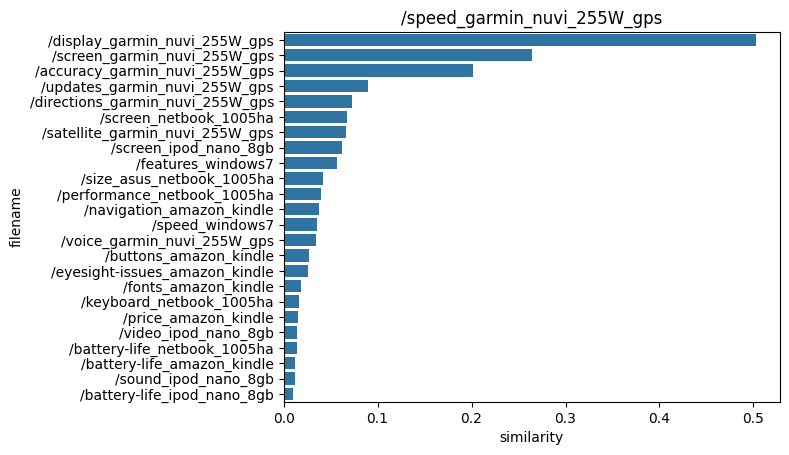

In [70]:
#첫번재 문서와 다른 문서 간에 유사도 높은 순으로 정렬 후 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#첫번째 문서와 타문서 간 유사도 큰순으로 정렬한 인덱스를 추출하되 자기 자신은 제외.
sorted_index=similarity_pair.argsort()[:,::-1]
sorted_index=sorted_index[:,1:]

#유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 유사도값을 재정렬하되 자기자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시가고하
hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value


sns.barplot(x="similarity", y="filename", data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()

## 9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

- 한글 nlp 처리의 어려움

-> 띄어쓰기, 다양한 조사

- 조사 : 경우의 수 많아서 어근 추출 등 전처리시 제거 까다로움

- KoNLPy : 파이썬의 대표적 한글 형태소 패키지 : 꼬꼬마, 한나눔, komoran, 은전한닢 프로젝트, twitter 5개의 형태소 분석 모듈 사용 가능 / Mecab 윈도우 환경 구동 안됨



In [41]:
# KoNLPy 설치

!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-04-06 10:00:27--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-04-06 10:00:28--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0dcf61c4caa158bd3ee192cfec.dl.dropboxusercontent.com/cd/0/get/CQhiE-VRoLl3Hl5a25CW6p0U_4WTbCE3gXF9SKeG0BD-m0xNEYF8igAKremPt4LsvVq2R0zsxyyKZ81GZwK30VtYn1SbjW6oTExJnZFOJ0Ahur0xN8NUVMyb0jwCI5gtD6TAG2ElOhBWAYpvJ98sn5VG/file?dl=1# [following]
--2024-04-06 10:00:28--  https://uc0dcf61c4caa158bd3ee192cfec.dl.dropboxusercontent.com/cd/0/get/CQhiE-VRoLl3Hl5a25CW6p0U_4WTbCE3gXF9SKeG0BD-m0xNEYF8igA

In [57]:
#데이터 로딩 네이버 영화 평점 데이터
import pandas as pd
train_df=pd.read_csv('/ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [58]:
#1이 긍정, 0이 부정감성 / 균동
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [59]:
#문자가 아닌 숫자의 경우 단어적 의미로 부족하므로 파이썬 정규표현식 모듈 re 이용해 공백으로 변환

import re

train_df=train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자롤 의미함.)
train_df['document']=train_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

#테스트 데이터 세트를 로딩하고 동일하게 null 및 숫자를 공백으로 변환
test_df=pd.read_csv('/ratings_test.txt',sep='\t')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x : re.sub(r"\d"," ",x))

#id 칼럼 삭제 수행
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [60]:
#형태소 단어로 토큰화 - tfidf 방식으로 단어 벡터화
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko=twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Twitter객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range 는 (1,2)
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2),min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [63]:
#로지스틱 회귀 이용해 감성 분석 분류 수행.
lg_clf=LogisticRegression(random_state=0)

#파라미터 c 최적화를 이용해 gridsearchcv를 이용.
params={'C': [1,3.5,4.5,5.5,10]}
grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy',verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8593


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#최종 감성 분석 예측
from sklearn.metrics import accuracy_score

tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)
print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도:  0.86186
